# Vehicle Image Classifier

## Data Set-Up

In this Vehicle Image Classifier, I followed the similar pattern of creating the model in my CalTech 101 Image Classifier, where I used over 9000 images from 101 categories previously collected by CalTech (thorough details on the model can be found there). However, instead of using a pre-made image dataset, the images used for this model were scrapped from Google Images. 

The images I scrapped from Google Images were either of cars, planes, or ships. By accessing the browser console and running some Javascript code, I managed to obtain the image URLs compiled into a file, to which I uploaded, cleaned, and tested.


Javascript Code:
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [1]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.widgets import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
bs = 64

In [4]:
folder = 'cars'
file = 'urls_cars.csv'

In [5]:
path = Path('data/vehicles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
download_images(path/file, dest, max_pics=200)

Error https://www.cartrack.co.za/sites/default/files/car.jpg HTTPSConnectionPool(host='www.cartrack.co.za', port=443): Max retries exceeded with url: /sites/default/files/car.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://www.carmax.com/~/media/images/carmax/com/articles/subaru-outback-review/rtb-subaru-outback-651x366.jpg?la=en&hash=D7816BEED5E7C672CD7EB14F6B5FE96196F83219 HTTPSConnectionPool(host='www.carmax.com', port=443): Read timed out. (read timeout=4)
Error https://www.carmax.com/cars/images/popular-models/crossovers/ford-edge/1x.jpg HTTPSConnectionPool(host='www.carmax.com', port=443): Read timed out. (read timeout=4)


In [7]:
folder = 'planes'
file = 'urls_planes.csv'

In [8]:
path = Path('data/vehicles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
download_images(path/file, dest, max_pics=200)

In [10]:
folder = 'ships'
file = 'urls_ships.csv'

In [11]:
path = Path('data/vehicles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
download_images(path/file, dest, max_pics=200)

Error https://www.northwestenvironmentaladvocates.org/newblog/wp-content/uploads/2017/06/Ship-pumping-Ballast-water_1.jpg HTTPSConnectionPool(host='www.northwestenvironmentaladvocates.org', port=443): Max retries exceeded with url: /newblog/wp-content/uploads/2017/06/Ship-pumping-Ballast-water_1.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://www.royalcaribbean.com/content/dam/royal/ports-and-destinations/destinations/perfect-day/perfect-day-coco-cay-thrillwater-park-aerial-close-up.jpg HTTPSConnectionPool(host='www.royalcaribbean.com', port=443): Read timed out. (read timeout=4)
Error https://www.bawat.com/media/1137/ship_solution.jpg?center=0.610223642172524,0.19666666666666666&mode=crop&width=1440&height=750&rnd=131540863150000000 HTTPSConnectionPool(host='www.bawat.com', port=443): Read timed out. (read timeout=4)
Error https://cruisedeals.expert/wp-content/uploads/2015/02/No

In [13]:
classes = ['cars','planes','ships']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cars


cannot identify image file <_io.BufferedReader name='data/vehicles/cars/00000152.jpg'>


/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:984: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/vehicles/cars/00000193.png'>
cannot identify image file <_io.BufferedReader name='data/vehicles/cars/00000149.jpg'>


/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/vehicles/cars/00000194.jpg'>


/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


planes


cannot identify image file <_io.BufferedReader name='data/vehicles/planes/00000136.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehicles/planes/00000182.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehicles/planes/00000028.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehicles/planes/00000118.jpg'>
ships


cannot identify image file <_io.BufferedReader name='data/vehicles/ships/00000141.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehicles/ships/00000153.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehicles/ships/00000154.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehicles/ships/00000187.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehicles/ships/00000073.jpg'>


## Image Classifcation Model: Creating & Training

From here, the code is similar to the CalTech 101 Image Classifier, where I go more into detail about the code.

It can be found here: https://github.com/ayushmore/CalTech101-Image-Classification-Model

In [14]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['cars', 'planes', 'ships']

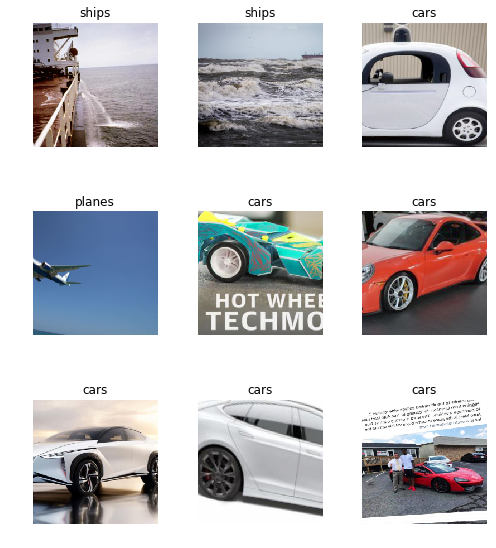

In [16]:
data.show_batch(rows=3, figsize=(7,8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['cars', 'planes', 'ships'], 3, 460, 114)

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.898896,0.160613,0.026316,00:08
1,0.480587,0.079543,0.026316,00:05
2,0.313407,0.080780,0.026316,00:05
3,0.236318,0.078978,0.026316,00:05


In [20]:
learn.save('stage-1')

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.055466,0.071906,0.026316,00:07
1,0.044984,0.047587,0.008772,00:06


In [23]:
learn.save('stage-2')

In [24]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (460 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cars,cars,cars,cars,cars
Path: data/vehicles;

Valid: LabelList (114 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
planes,cars,cars,planes,planes
Path: data/vehicles;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

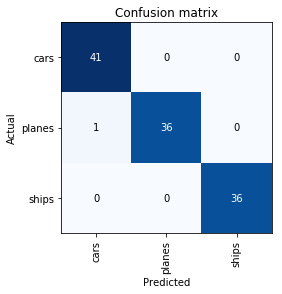

In [26]:
interp.plot_confusion_matrix()

In [35]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [36]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [37]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

## Exporting the Model: Production

In [30]:
learn.export()

In [31]:
defaults.device = torch.device('cpu')

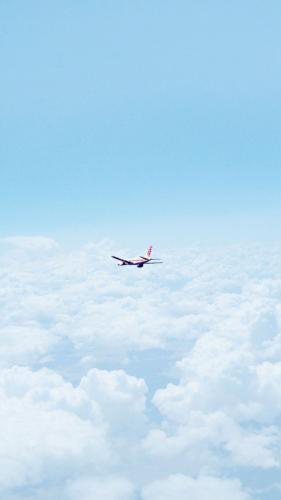

In [32]:
img = open_image(path/'planes'/'00000046.jpg')
img

In [33]:
learn = load_learner(path)

In [34]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category planes

# Conclusion

I put this model into production through using Render, which created a website that implemented this model and can be accessed through the web. 

Here is the website: https://ayush-vehicles.onrender.com/

For more specific details on the code, access the CalTech 101 Image Classifier notebook. The key differences in this model was that I collected the images myself through Google Images and implemented the model through a website.